In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [3]:
cancer = load_breast_cancer()

In [4]:
#get deteministic random numbers
rng=np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))
#add noise to the data
#the first 30 features are from the dataset and the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test=train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)


([], [])

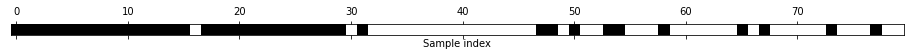

In [5]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [ ]:
'''
1. results are better than univariate and model based selection, but one feature was still missed
2. Running the code also takes longer, because random forest model is trained 40 times once for
each feature that is dropped.
'''

In [6]:
X_train_rfe = select.transform(X_train)
X_test_rfe= select.transform(X_test)
lr=LogisticRegression().fit(X_train_rfe, y_train)
print("Score with only selected features", format(lr.score(X_test_rfe, y_test)))


Score with only selected features 0.9298245614035088


C:\Users\Saina\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
'''
1. Performance of the random forest used inside teh RFE is the same as that achieved by training
a logistic regression model on top of the select features.
that is with right features teh linear model performs as well as the random forest
'''